## Matplotlib Stock prices visualization
- Using pandas_datereader to download stocks history (has some warning, but still works on rev0.6.0)
- Create graphs of closing prices and checking out trends using pandas rolling feature

Example learned from http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/

In [1]:
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_stocks_history(stocks_code, start_date, end_date):
    # Using pandas_reader.data.DataReader (w/ google onlinedata source)
    df = data.DataReader(stocks_code, 'google', start_date, end_date)
    return df

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


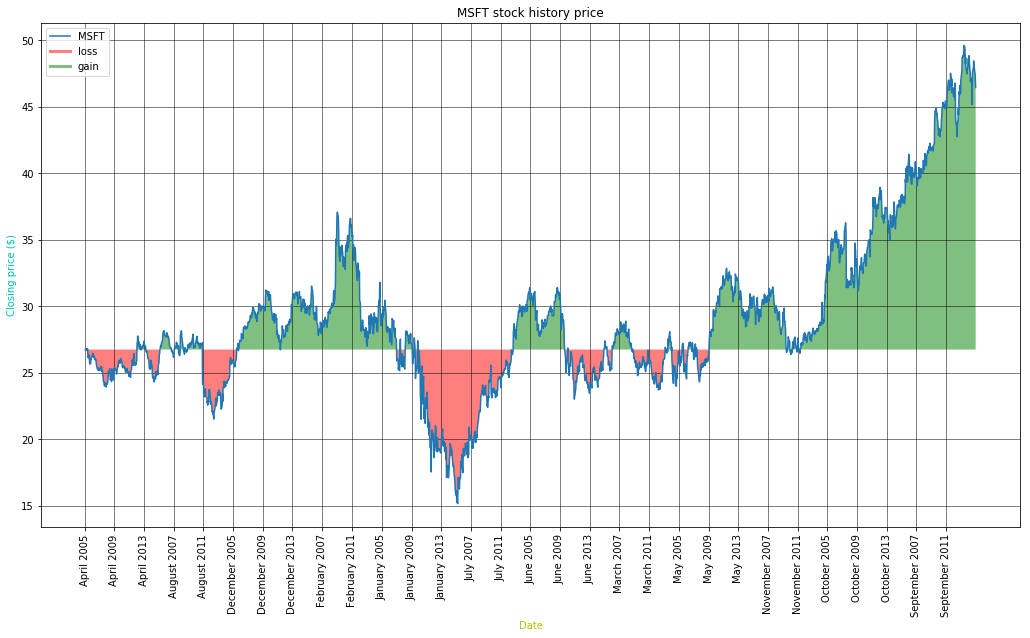

In [3]:
# Retrieving 
stocks_code='MSFT'
msft = get_stocks_history(stocks_code, '2005-01-01', '2014-12-31')

dates = msft.index
values = msft['Close'].values

# Clear matplotlib canvas
plt.clf()
# Create figure to set canvas size
fig = plt.figure(figsize=(16,10))

# crate axis variable to make changes
ax = plt.subplot2grid((1,1), (0,0))

#Plot main line
ax.plot(dates, values, '-', label=stocks_code)

# We want to clearly know when the stock closed under the IPO price
# So fill the graph with gain (green) and loss (red) color if the 
# values is greater or lesser than the IPO value, respectively
ax.fill_between(dates, values, values[0],where=(values > values[0]), facecolor='g', alpha=0.5)
ax.fill_between(dates, values, values[0],where=(values < values[0]), facecolor='r', alpha=0.5)
# Create new labels to simulate the gain/loss legend
ax.plot([],[],linewidth=3, label='loss', color='r',alpha=0.5)
ax.plot([],[],linewidth=3, label='gain', color='g',alpha=0.5)

# Rotating labels of x-axis
for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)

# Set label colors
ax.xaxis.label.set_color('y')
ax.yaxis.label.set_color('c')

# Show grid lines
ax.grid(True, color='k', alpha=0.5, linestyle='-', linewidth=1)

# Set X ticks to show 2 months of every year
ax.set_xticks(np.unique(dates.strftime('%Y/%m'))[::4])
ax.set_xticklabels(np.unique(dates.strftime('%B %Y'))[::4])

plt.title(stocks_code+' stock history price')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/pandas_datareader/google/daily.py:40: UnstableAPIWarning: 
The Google Finance API has not been stable since late 2017. Requests seem
to fail at random. Failure is especially common when bulk downloading.

  warnings.warn(UNSTABLE_WARNING, UnstableAPIWarning)


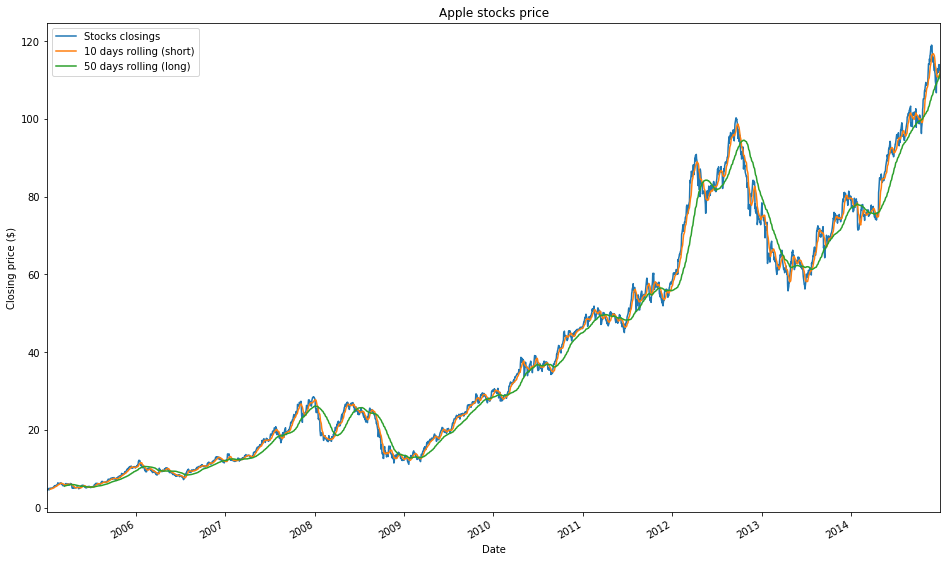

In [4]:
# Ploting Apple stock series
# In order to compared the behavior of this stock in a short and long term, we use pandas rolling 
# window feture to create a simple moving average of the original time-series. The rolling feature
# takes into account the last [n] prices to apply a fuction (e.g. mean, sum, std).

# Retrieving 
stocks_code='AAPL'
aapl = get_stocks_history(stocks_code, '2005-01-01', '2014-12-31')

# Calculate the 20 and 100 days moving averages of the closing prices
aapl_rolling_20 =  aapl['Close'].rolling(window=10).mean()
aapl_rolling_100 = aapl['Close'].rolling(window=50).mean()

# Plot everything by leveraging the very powerful matplotlib package
fig = plt.figure(figsize=(16,10))

# Clear matplotlib canvas
plt.clf()
# plot graph of closing prices and rolling lines
aapl['Close'].plot(label='Stocks closings')
aapl_rolling_20.plot(label='10 days rolling (short)')
aapl_rolling_100.plot(label='50 days rolling (long)')
plt.title('Apple stocks price')
plt.xlabel('Date')
plt.ylabel('Closing price ($)')
plt.legend()
plt.show()